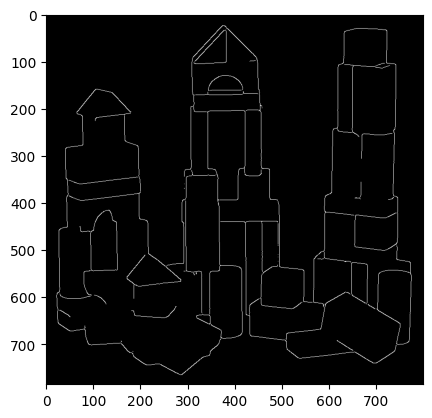

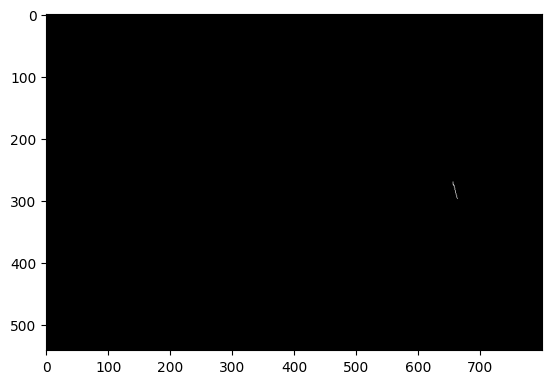

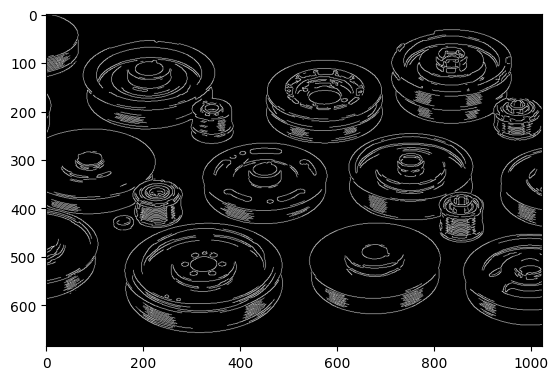

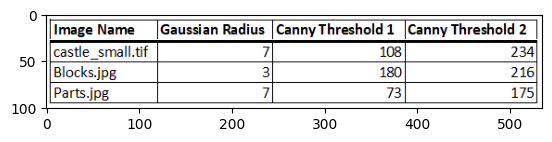

In [6]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def null(x):
    pass

cv2.namedWindow('Castle')

cv2.createTrackbar("Canny T1: ", "Castle", 0, 255, null) 
cv2.createTrackbar("Canny T2: ", "Castle", 0, 255, null)
cv2.createTrackbar("Gauss Kernal: ", "Castle", 0, 21, null)


cv2.namedWindow('Blocks')

cv2.createTrackbar("Canny T1: ", "Blocks", 0, 255, null) 
cv2.createTrackbar("Canny T2: ", "Blocks", 0, 255, null)
cv2.createTrackbar("Gauss Kernal: ", "Blocks", 0, 21, null)


cv2.namedWindow('Parts')

cv2.createTrackbar("Canny T1: ", "Parts", 0, 255, null) 
cv2.createTrackbar("Canny T2: ", "Parts", 0, 255, null)
cv2.createTrackbar("Gauss Kernal: ", "Parts", 0, 21, null)

picShow1 = False
picShow2 = False
picShow3 = False

while True:

# Castle Image
    castle = cv2.imread('castle_small.tif')

    castleCannyTh1 = cv2.getTrackbarPos('Canny T1: ', 'Castle')

    castleCannyTh2 = cv2.getTrackbarPos('Canny T2: ', 'Castle')

    castleGaussKernalSize = cv2.getTrackbarPos('Gauss Kernal: ' ,'Castle')

    # Kernal values that make it like instructions is (3,3)
    if castleGaussKernalSize % 2 == 1: # Kernal value has to be odd
         bluredCastle = cv2.GaussianBlur(castle,(castleGaussKernalSize,castleGaussKernalSize),0)
    else:
         castleGaussKernalSize -= 1 # Else case means kernal value is an even number
         if castleGaussKernalSize <= 0: # Checks to make sure that it doesn't go out of bounds for the blur function ex if kernal was 0 in trackbar and then you minus 1 you would be out of bounds
              bluredCastle = castle # If so apply no filter
         else:
              bluredCastle = cv2.GaussianBlur(castle,((castleGaussKernalSize),(castleGaussKernalSize)),0)

    castleEdges = cv2.Canny(bluredCastle,castleCannyTh1,castleCannyTh2) # Since both threshold values start at 0, all edges are shown. The higher the threshold, the less edges there will be. Only the prominite edges will be shown

    cv2.imshow('Castle', castleEdges)
    cv2.imwrite('Edges_Castle.jpg', castleEdges)



# Blocks Image

    blocks = cv2.imread('Blocks.jpg')

    blockCannyTh1 = cv2.getTrackbarPos('Canny T1: ', 'Blocks')

    blockCannyTh2 = cv2.getTrackbarPos('Canny T2: ', 'Blocks')

    blockGaussKernalSize = cv2.getTrackbarPos('Gauss Kernal: ' ,'Blocks')

    # Kernal values that make it like instructions is (3,3)
    if blockGaussKernalSize % 2 == 1: # Kernal value has to be odd
         bluredBlocks = cv2.GaussianBlur(blocks,(blockGaussKernalSize,blockGaussKernalSize),0)
    else:
         blockGaussKernalSize -= 1 # Else case means kernal value is an even number
         if blockGaussKernalSize <= 0: # Checks to make sure that it doesn't go out of bounds for the blur function ex if kernal was 0 in trackbar and then you minus 1 you would be out of bounds
              bluredBlocks = blocks # If so apply no filter
         else:
              bluredBlocks = cv2.GaussianBlur(blocks,((blockGaussKernalSize),(blockGaussKernalSize)),0)

    blockEdges = cv2.Canny(bluredBlocks,blockCannyTh1,blockCannyTh2) # Since both threshold values start at 0, all edges are shown. The higher the threshold, the less edges there will be. Only the prominite edges will be shown

    cv2.imshow('Blocks', blockEdges)

    cv2.imwrite('Edges_Blocks.jpg', blockEdges)

          
              
# Parts Image

    parts = cv2.imread('Parts.jpg')

    partsCannyTh1 = cv2.getTrackbarPos('Canny T1: ', 'Parts')

    partsCannyTh2 = cv2.getTrackbarPos('Canny T2: ', 'Parts')

    partsGaussKernalSize = cv2.getTrackbarPos('Gauss Kernal: ' ,'Parts')

    # Kernal values that make it like instructions is (3,3)
    if partsGaussKernalSize % 2 == 1: # Kernal value has to be odd
         bluredParts = cv2.GaussianBlur(parts,(partsGaussKernalSize,partsGaussKernalSize),0)
    else:
         partsGaussKernalSize -= 1 # Else case means kernal value is an even number
         if partsGaussKernalSize <= 0: # Checks to make sure that it doesn't go out of bounds for the blur function ex if kernal was 0 in trackbar and then you minus 1 you would be out of bounds
              bluredParts = parts # If so apply no filter
         else:
              bluredParts = cv2.GaussianBlur(parts,((partsGaussKernalSize),(partsGaussKernalSize)),0)

    partEdges = cv2.Canny(bluredParts,partsCannyTh1,partsCannyTh2) # Since both threshold values start at 0, all edges are shown. The higher the threshold, the less edges there will be. Only the prominite edges will be shown

    cv2.imshow('Parts', partEdges)

    cv2.imwrite('Edges_Parts.jpg', partEdges)

    key = cv2.waitKey(1)
    if key == 27: # exit on ESC (27 is ASCII for ESC)       
          cv2.destroyAllWindows()
          break
    
blockDisplayImg = cv2.cvtColor(blockEdges,cv2.COLOR_BGR2RGB)
plt.imshow(blockDisplayImg)
plt.show()

castleDisplayImg = cv2.cvtColor(castleEdges,cv2.COLOR_BGR2RGB)
plt.imshow(castleDisplayImg)
plt.show()

partsDisplayImg = cv2.cvtColor(partEdges,cv2.COLOR_BGR2RGB)
plt.imshow(partsDisplayImg)
plt.show()

chartView = cv2.imread('ChartSize.png')
chartViewImg = cv2.cvtColor(chartView,cv2.COLOR_BGR2RGB)
plt.imshow(chartViewImg)
plt.show()